<a href="https://colab.research.google.com/github/simonsavine/school_projects/blob/main/newton/conv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

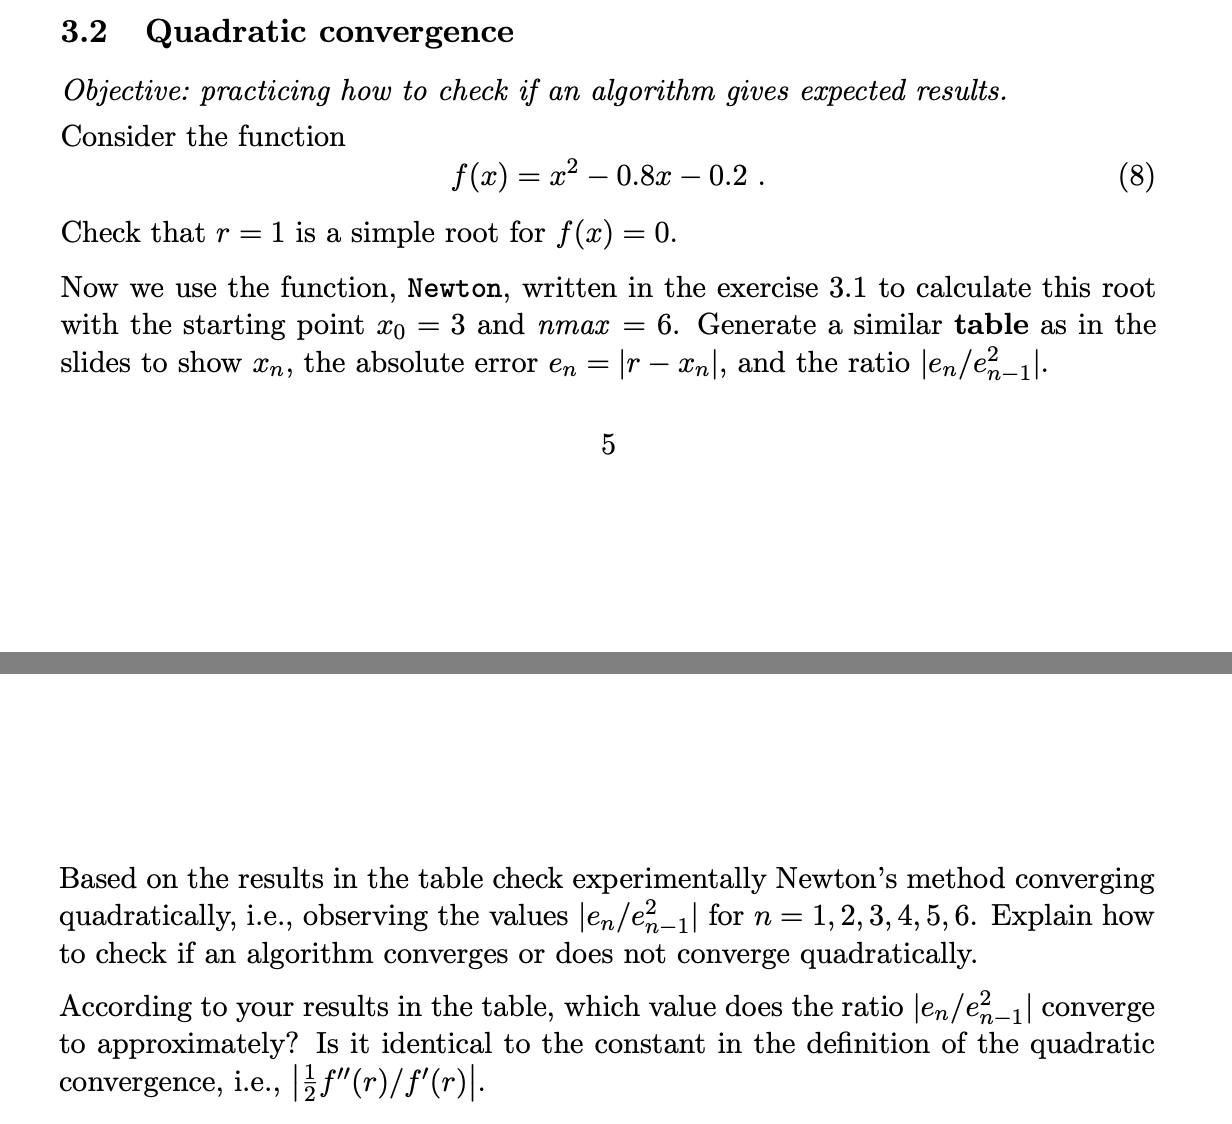

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def f(x):
  return x**2 - 0.8*x - 0.2

assert np.isclose(f(1), 0)

In [5]:
def newt(f, df, x0, nmax):
  xs = []
  x = x0
  xs.append(x)
  for _ in range(nmax):
    x = x - f(x) / df(x)
    xs.append(x)
  return np.array(xs)

In [6]:
def df(x):
  return 2*x - 0.8

In [9]:
xs = newt(f, df, 3, 6)
root = xs[-1]
assert np.isclose(root, 1)
root

1.0000000000001037

In [11]:
r = 1
errs = np.abs(xs - 1)
ratios = np.abs(errs[1:] / (errs[:-1] ** 2))
errs, ratios

(array([2.00000000e+00, 7.69230769e-01, 2.16076059e-01, 2.86057057e-02,
        6.50874143e-04, 3.52648409e-07, 1.03694830e-13]),
 array([0.19230769, 0.36516854, 0.61268799, 0.79541117, 0.83243032,
        0.8338218 ]))

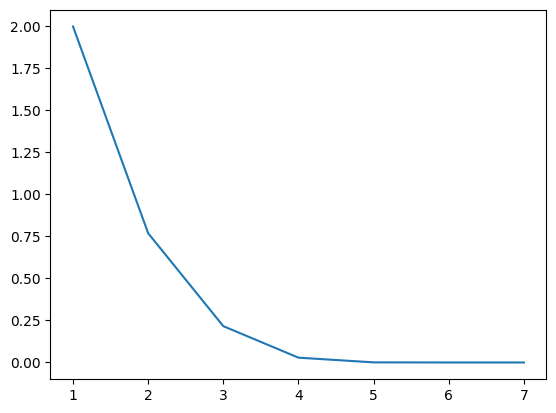

In [15]:
plt.plot(np.arange(7) + 1, errs)

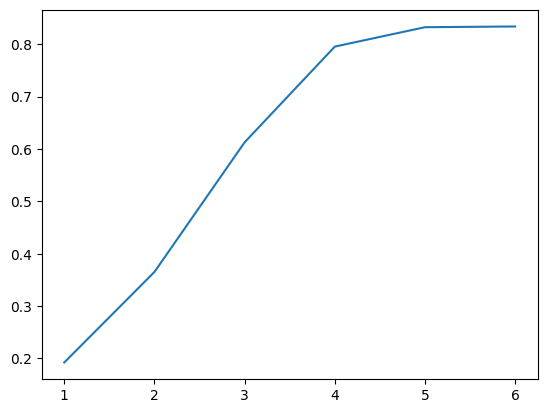

In [16]:
plt.plot(np.arange(6) + 1, ratios)

In [19]:
# it looks like ratios converge
empirical_ratio = ratios[-1]

# theoretical
def ddf(x):
  return 2

theo_ratio = 0.5 * ddf(r) / df(r)

empirical_ratio, theo_ratio

(0.8338218049916704, 0.8333333333333334)